<a href="https://colab.research.google.com/github/mjksill/CP540-online/blob/main/notebooks/Pandas_4_Interpreting_Solar_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering and Interpreting Data


This worksheet will focus on uploading data from a csv file into Google Colab, and analysing it.
Firstly we import the file we require - in this case it is data on solar radiation collected from a surface station (get data [here](https://) **Need to upload file** ).

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving midas-open_uk-radiation-obs_dv-202107_lanarkshire_00987_drumalbin_qcv-1_1995.csv to midas-open_uk-radiation-obs_dv-202107_lanarkshire_00987_drumalbin_qcv-1_1995 (1).csv


Then we import the data to a dataframe.

In [3]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['midas-open_uk-radiation-obs_dv-202107_lanarkshire_00987_drumalbin_qcv-1_1995.csv']),
                skipinitialspace=True)

print(df)

           Conventions     G  \
0                title     G   
1               source     G   
2              creator     G   
3             activity     G   
4         feature_type     G   
...                ...   ...   
8518  31/12/1995 21:00  DCNN   
8519  31/12/1995 22:00  DCNN   
8520  31/12/1995 23:00  DCNN   
8521  31/12/1995 23:59  DCNN   
8522          end data   NaN   

                                               BADC-CSV    1 Unnamed: 4  \
0                                      uk-radiation-obs  NaN        NaN   
1                             Met Office MIDAS database  NaN        NaN   
2                                            Met Office  NaN        NaN   
3     Met Office MIDAS Open: UK Land Surface Station...  NaN        NaN   
4                                          point series  NaN        NaN   
...                                                 ...  ...        ...   
8518                                               6465    1          1   
8519           

As we can see there are quite a few columns that we don't require, and also a lot of inital rows we don't need. By looking at the csv file we can see the first 74 rows aren't important, so we can skip these when setting up the dataframe using the following command.

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['midas-open_uk-radiation-obs_dv-202107_lanarkshire_00987_drumalbin_qcv-1_1995.csv']),

                skiprows=[*range(75)], skipinitialspace=True)

print(df)

           ob_end_time id_type      id  ob_hour_count  version_num  \
0     01/01/1995 00:00    DCNN  6465.0            1.0          1.0   
1     01/01/1995 01:00    DCNN  6465.0            1.0          1.0   
2     01/01/1995 02:00    DCNN  6465.0            1.0          1.0   
3     01/01/1995 03:00    DCNN  6465.0            1.0          1.0   
4     01/01/1995 04:00    DCNN  6465.0            1.0          1.0   
...                ...     ...     ...            ...          ...   
8443  31/12/1995 21:00    DCNN  6465.0            1.0          1.0   
8444  31/12/1995 22:00    DCNN  6465.0            1.0          1.0   
8445  31/12/1995 23:00    DCNN  6465.0            1.0          1.0   
8446  31/12/1995 23:59    DCNN  6465.0           24.0          1.0   
8447          end data     NaN     NaN            NaN          NaN   

     met_domain_name  src_id  rec_st_ind  glbl_irad_amt_q  Unnamed: 9  ...  \
0                HCM   987.0      2001.0              0.0         9.0  ...   
1  

Now to get rid of the columns we don't need, we can remove them using their column indexes. We can also remove the bottom row of data as it is blank.

From looking at the data we can see that there are measurements every hour, but at the end of each day there is also a cumulative measurement. Lets remove all the hourly data, and focus on the 24 hour daily data. 

We can also see there is timestamps on each row of data in the 'ob_end_time' column. To ensure this is recognised as a time and date, we must define it as such. Once this is done, we can also create a new column containing the date for each row of data, but in a different format. 

Once this is complete, we can then plot the data to visualise it. 

             ob_end_time  ob_hour_count met_domain_name  glbl_irad_amt_q  \
24   1995-01-01 23:59:00           24.0         DRADR35           2358.0   
49   1995-01-02 23:59:00           24.0         DRADR35           2387.0   
74   1995-01-03 23:59:00           24.0         DRADR35           2167.0   
99   1995-01-04 23:59:00           24.0         DRADR35            950.0   
124  1995-01-05 23:59:00           24.0         DRADR35           1559.0   
...                  ...            ...             ...              ...   
8229 1995-12-22 23:59:00           24.0         DRADR35            518.0   
8254 1995-12-23 23:59:00           24.0         DRADR35           2113.0   
8278 1995-12-24 23:59:00           24.0         DRADR35           2765.0   
8303 1995-12-25 23:59:00           24.0         DRADR35           2146.0   
8446 1995-12-31 23:59:00           24.0         DRADR35            684.0   

     timestamp  
24     01/1995  
49     01/1995  
74     01/1995  
99     01/1995  
12

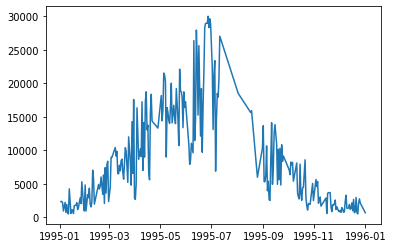

In [5]:
df = df.drop(df.columns[[1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1)        # Drop unrequiured columns
df = df.drop([8447], axis = 0)                                                # Drop bottom row of data

df = df[df.ob_hour_count != 1]                                                # Remove all rows that contain data collected hourly

import pylab as plt
import datetime as datetime

df['ob_end_time'] = pd.to_datetime(df.ob_end_time, format='%d/%m/%Y %H:%M')   # Define the 'ob_end_time' column as a date and time
df['timestamp'] = df['ob_end_time'].dt.strftime('%m/%Y')                      # Create a new column showing the date in a different format

df.dropna()                                                                   # This just drops any rows which contain no data

print(df)

df = df.sort_values('ob_end_time', ascending=True)                            # This just confirms the data is sorted in the correct order
plt.plot(df['ob_end_time'], df['glbl_irad_amt_q'])                            # Plot the solar irradiation against time/date

From the graph we see that it looks like there is data missing from between July and September. We will come back to this later. 

We can caculate the mean solar irradiation for each month and plot this to see how it varies over the year. 

['01/1995', '02/1995', '03/1995', '04/1995', '05/1995', '06/1995', '07/1995', '08/1995', '09/1995', '10/1995', '11/1995', '12/1995']
[1882.25, 4423.681818181818, 8141.68, 12282.631578947368, 16613.44827586207, 20030.2, 18563.5, 13336.666666666666, 7961.916666666667, 4734.125, 2586.6521739130435, 1529.84]


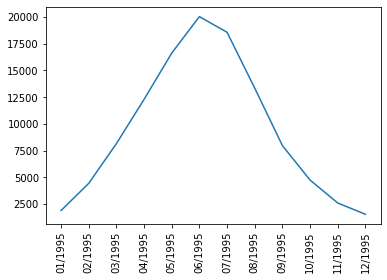

In [6]:
import datetime
import numpy as np

months = pd.date_range('1995-01-01','1995-12-31',                             # This creates a list of the months we have data for - January to Decemeber 1995
              freq='MS').strftime("%m/%Y").tolist()
print(months)    

avgq = []                                                                     # We then create an empty list to store the average data 
for i in months:                                                              # Using a for loop we can then loop through each month, and pandas will give us the
    avgq.append((df.loc[df['timestamp'] == i, 'glbl_irad_amt_q'].mean()))     # mean of the solar irradiation

print(avgq)

plt.plot(months, avgq)
plt.xticks(rotation=90)
plt.show()

A density plot could also be used to show how the solar irradiation collected is distributed.

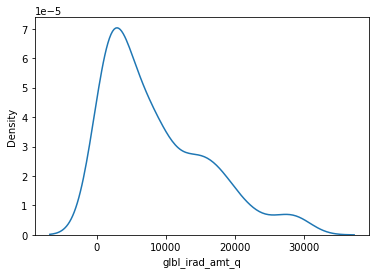

In [7]:
# library & dataset
import seaborn as sns

# plot
sns.kdeplot(df['glbl_irad_amt_q'])

Now to return to the missing data - lets use some plots we've seen previously. 

In [8]:
import plotly.express as px

fig1 = px.line(df, x = 'ob_end_time', y = 'glbl_irad_amt_q')

fig1.show()

<BarContainer object of 260 artists>

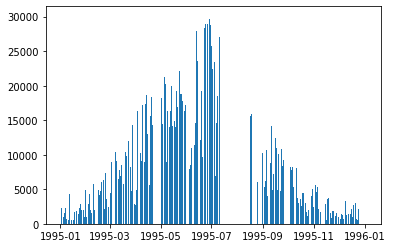

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
x = df['ob_end_time'].tolist()
y = df['glbl_irad_amt_q'].tolist()


plt.bar(x, y)


We can clearly see by extracting the daily results from the dataframe, that there is no daily 24 hour data for most of July and August. This may be due to an error in recording the data at the end of each day, so needs investigated further.

We can try filtering the original data by removing the data for every 24 hours, and instead use the hourly data to analyse. To do this, we can create a new dataframe to manipulate. We need to give it a new name, in this case 'df1', but apart from that we can copy the code we used previously. 

             ob_end_time  ob_hour_count met_domain_name  glbl_irad_amt_q  \
0    1995-01-01 00:00:00            1.0             HCM              0.0   
1    1995-01-01 01:00:00            1.0             HCM              0.0   
2    1995-01-01 02:00:00            1.0             HCM              0.0   
3    1995-01-01 03:00:00            1.0             HCM              0.0   
4    1995-01-01 04:00:00            1.0             HCM              0.0   
...                  ...            ...             ...              ...   
8441 1995-12-31 19:00:00            1.0             HCM              0.0   
8442 1995-12-31 20:00:00            1.0             HCM              0.0   
8443 1995-12-31 21:00:00            1.0             HCM              0.0   
8444 1995-12-31 22:00:00            1.0             HCM              0.0   
8445 1995-12-31 23:00:00            1.0             HCM              0.0   

       timestamp  
0     1995-01-01  
1     1995-01-01  
2     1995-01-01  
3     1995-

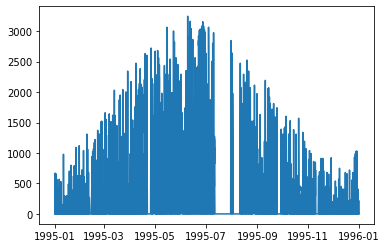

In [10]:
df1 = pd.read_csv(io.BytesIO(uploaded['midas-open_uk-radiation-obs_dv-202107_lanarkshire_00987_drumalbin_qcv-1_1995.csv']),

                skiprows=[*range(75)], skipinitialspace=True)

df1 = df1.drop(df1.columns[[1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1)
df1 = df1.drop([8447], axis = 0)

df1 = df1[df1.ob_hour_count != 24]

df1['ob_end_time'] = pd.to_datetime(df1.ob_end_time, format='%d/%m/%Y %H:%M')
df1['timestamp'] = df1['ob_end_time'].dt.strftime('%Y-%m-%d')

print(df1)

df1 = df1.sort_values('ob_end_time', ascending=True)
plt.plot(df1['ob_end_time'], df1['glbl_irad_amt_q'])

Judging by this set of the data, there was clearly an issue in those time periods recording data in general. 

Nonetheless, we can still find and plot the average solar irradiation for each day of the year we have data for, and this can be done using code we have previously used, with some small tweaks.

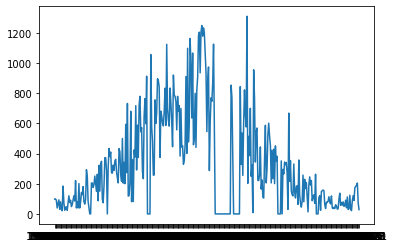

In [11]:
days = pd.date_range('1995-01-01','1995-12-31',                               # Instead of months, we create a list of days for the year
              freq='D').strftime("%Y-%m-%d").tolist()
#print(days)    

dailyavgq = []                                                                
for i in days:
    dailyavgq.append((df1.loc[df1['timestamp'] == i, 'glbl_irad_amt_q'].mean()))

#print(dailyavgq)

plt.plot(days, dailyavgq)

So here we have the irradiation for each day, however the x-axis label is very messy - this is due to all the days of the year being using as x-ticks. To correct this, we can create a third dataframe. 

           days   dailyavgq
0    1995-01-01   98.250000
1    1995-01-02   99.458333
2    1995-01-03   90.333333
3    1995-01-04   39.583333
4    1995-01-05   64.958333
..          ...         ...
360  1995-12-27  181.833333
361  1995-12-28  191.000000
362  1995-12-29  204.565217
363  1995-12-30   72.000000
364  1995-12-31   28.500000

[365 rows x 2 columns]


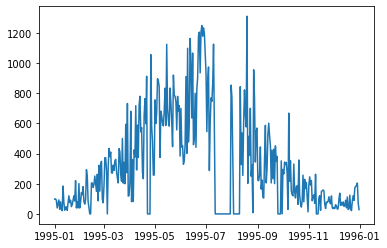

In [12]:
df2 = pd.DataFrame({'days':days,                                              # Create the new dataframe and define the columns and their data
                    'dailyavgq' : dailyavgq})
print (df2) 

df2['days'] = pd.to_datetime(df2.days, format='%Y-%m-%d')                     # Define the date format for the days column

plt.plot(df2['days'], df2['dailyavgq'])

That's a lot more tidier. If we wanted to we could filter the data to find out the exact dates where we have no data, but we can also use the `plotly.express` interactive graph to see this more clearly.

In [13]:
import plotly.express as px

fig = px.line(df2, x = 'days', y = 'dailyavgq')

fig.show()

Using this we can pinpoint the days that there were no data recorded. We also notice there are other days throughout the year where no data was recorded. 

### Conclusion

We've seen in this worksheet once again how to manipulate data in a dataframe, and how to use code we have previously wrote, and tweak it to be useful in other circumstances. 